# State of the art methods 

## Apply in Alabama Time Series

In [1]:
import sys
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette(n_colors=21)

In [2]:
# read data
ala = pd.read_csv('data/Enrollments.csv', sep=';', index_col=[0], parse_dates=[0])
col = ala.keys().to_list()[0]

## Chen method 1996

In [3]:
from FTS.Models.Chen import Chen1996

No handles with labels found to put in legend.


Chen 1996 model
MAPE......: 3.11
------------------------------
MAE.......: 498.81
------------------------------
MSE.......: 407521.34
------------------------------
RMSE......: 638.37
------------------------------
DTW.......: 7153.0


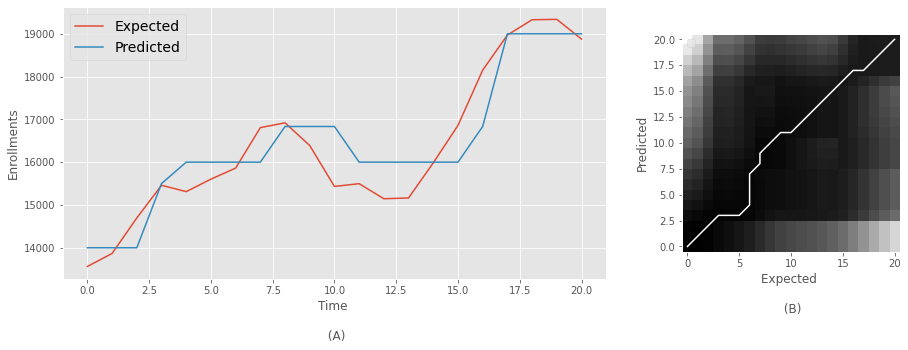

(3.11, 498.81, 407521.34, 638.37, 7153.0)

In [4]:
model = Chen1996()
model.fit(ala[col].values, sets=7, d1=55, d2=663)
model.predict()

## Lee method 2009

No handles with labels found to put in legend.



SUMMARY
------------------------------
FLRG:
 {'A.3': ['A.3', 'A.3', 'A.3', 'A.4', 'A.3', 'A.3', 'A.3', 'A.3', 'A.4'], 'A.5': [], 'A.7': ['A.7', 'A.6'], 'A.2': ['A.3'], 'A.1': ['A.1', 'A.1', 'A.2'], 'A.4': ['A.4', 'A.4', 'A.3', 'A.6'], 'A.6': ['A.6', 'A.7']}

MAPE......: 3.01
------------------------------
MAE.......: 485.77
------------------------------
MSE.......: 407304.41
------------------------------
RMSE......: 638.2
------------------------------
DTW.......: 6656.444560073316


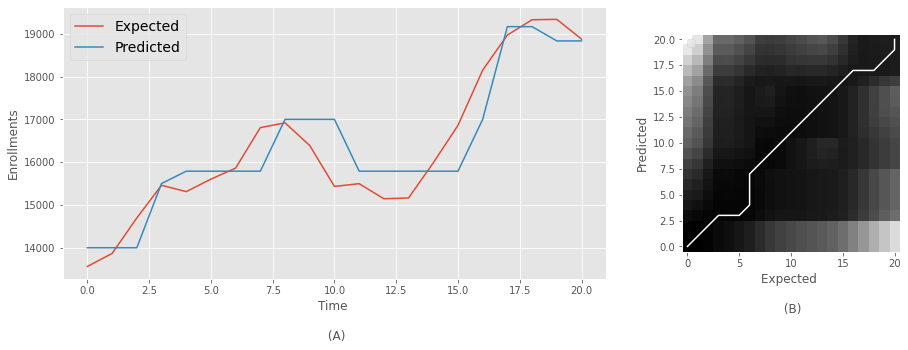

(3.01, 485.77, 407304.41, 638.2, 6656.444560073316)

In [5]:
from FTS.Models.Lee import Lee2009
model = Lee2009()
model.fit(ala[col].values, sets=7, d1=55, d2=663)
model.summary()
model.predict()

## Wang method 2013 + Chen method 1996

In [6]:
from FTS.Models.Wang_Chen import Wang2013_Chen
from FTS.Models.Wang_Lee import Wang2013_Lee

No handles with labels found to put in legend.


MAPE......: 2.76
------------------------------
MAE.......: 450.33
------------------------------
MSE.......: 334427.01
------------------------------
RMSE......: 578.3
------------------------------
DTW.......: 7566.0416666666715


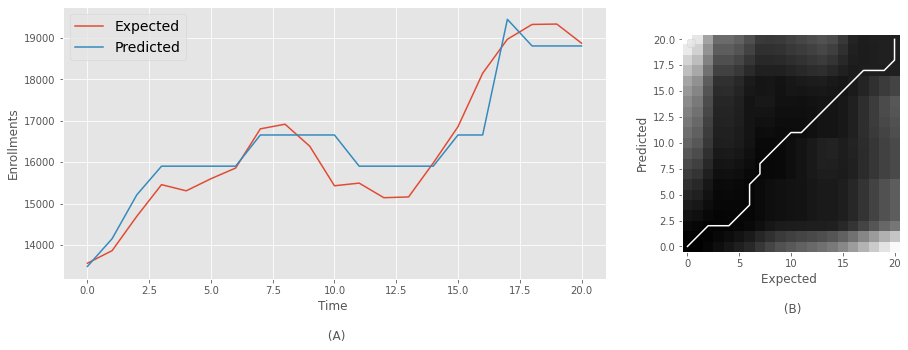

(2.76, 450.33, 334427.01, 578.3, 7566.0416666666715)

In [7]:
model = Wang2013_Chen()
model.fit(ala[col].values, sets=7, d1=55, d2=663)
model.predict()

## Wang method 2013 + Lee method 2009

No handles with labels found to put in legend.


MAPE......: 2.68
------------------------------
MAE.......: 438.51
------------------------------
MSE.......: 330914.1
------------------------------
RMSE......: 575.25
------------------------------
DTW.......: 6297.25


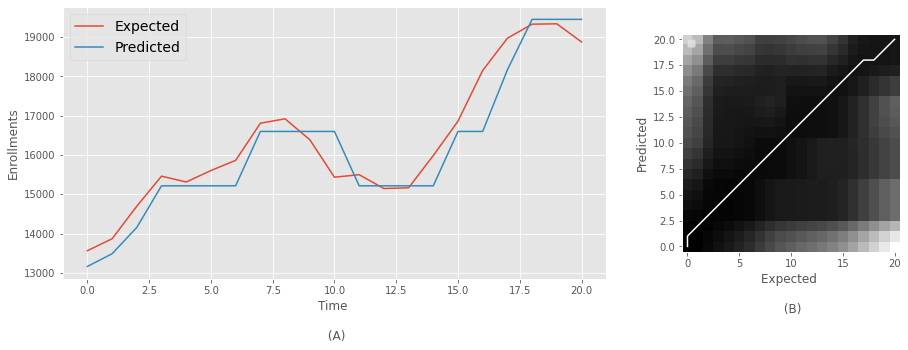

(2.68, 438.51, 330914.1, 575.25, 6297.25)

In [8]:
model = Wang2013_Lee()
model.fit(ala[col].values, sets=7, d1=55, d2=663)
model.predict()

## Proposed Method + Chen method 1996

In [9]:
from FTS.Models.MV_Chen import STFMV_Convencional_Chen
from FTS.Models.MV_Lee import STFMV_Convencional_Lee

In [10]:
# pre processing

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ala[col].values)

df_fts = pd.DataFrame(ala[col].copy())
df_fts[col] = ala

col_imf = 'residue'
df_fts[col_imf] = imfs[1]+imfs[2]

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 2.46
------------------------------
MAE.......: 398.89
------------------------------
MSE.......: 236852.18
------------------------------
RMSE......: 486.67
------------------------------
DTW.......: 5901.500070891652


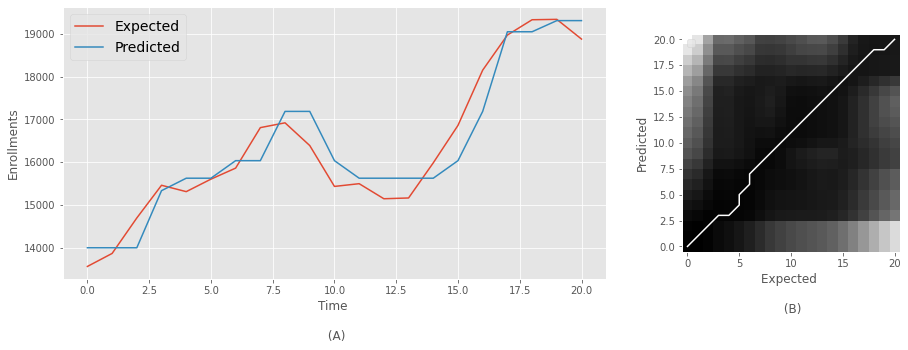

(2.46, 398.89, 236852.18, 486.67, 5901.500070891652)

In [11]:
model = STFMV_Convencional_Chen()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()

### Proposed Method + Lee method 2009

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 2.41
------------------------------
MAE.......: 389.9
------------------------------
MSE.......: 219025.42
------------------------------
RMSE......: 468.0
------------------------------
DTW.......: 6482.662372670367


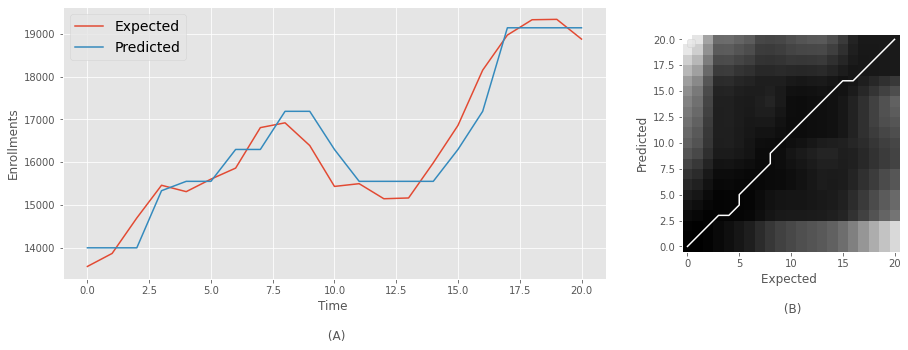

(2.41, 389.9, 219025.42, 468.0, 6482.662372670367)

In [12]:
model = STFMV_Convencional_Lee()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()